In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm 
from sklearn import metrics
from sklearn import linear_model
from joblib import dump, load

In [53]:
def read_csv():
    path = '/home/juan/Desktop/TESIS/Codes/newCodes/Datasets/RandomEvents-TrainingData/TrainingData_BiClass.csv'
    Y =  pd.read_csv(path,usecols=['Label'])

    complete_dataset = pd.read_csv(path, usecols=["Valor (%)","Valor (hPa)","Valor (W/m2)","Valor (°C)","Valor (m/s)"])

    datasetPCA = pd.read_csv(path, usecols= ["Valor (%)","Valor (W/m2)", "Valor (°C)",])
    
    datasetRR = pd.read_csv(path, usecols= ["Valor (hPa)", "Valor (°C)","Valor (m/s)"])

    datasetPCA_RR = pd.read_csv(path, usecols= ["Valor (%)","Valor (hPa)", "Valor (°C)",])


    print("complete_dataset\n",complete_dataset)
    print("datasetPCA\n",datasetPCA)
    print("datasetRR\n",datasetRR)    
    print("datasetPCA_RR\n",datasetPCA_RR)

    print("Y\n",Y)


    #return(complete_dataset,reduced_datasetPCA1,reduced_datasetPCA2,reduced_datasetRelief1,reduced_datasetRelief2,reduced_dataset_PCA_Relief,Y)
    return(complete_dataset,datasetPCA,datasetRR,datasetPCA_RR,Y)


In [54]:
def standarize(Dataset):
    # z= (x - u) / s
    # where u=mean, s= stand deviatoin

    #cols names
    names = Dataset.columns   

    # Create the Scaler object
    scaler = preprocessing.StandardScaler()
    
    # Fit your data on the scaler object
    scaled_Dataset = scaler.fit_transform(Dataset)
    scaled_Dataset = pd.DataFrame(scaled_Dataset, columns=names)    

    return(scaled_Dataset)


In [55]:
def trainSVM(X,Y,name,scoreDataset):

    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, np.ravel(Y), test_size = 0.25)

        #make_svv
        clf =  svm.SVC(kernel='rbf',C=100.0, gamma=1, max_iter=-1, class_weight='balanced')

        # Train classifier 
        clf.fit(X_train, y_train)               

        # Mean accuracy of self.predict(X) wrt. y.            
        accu=np.round(clf.score(X_test, y_test) *100,decimals=3)      

        #if accu>87:
            #print("Accuracy=",accu,"%")
            #s=input("save?")
            #if s =='y':
            #  filename = 'SVM_'+name+'.joblib'
            #  dump(clf, filename)        

        scoreDataset.append(accu)   
        




In [56]:
def graph_bp(scores):    
    scores_frame = pd.DataFrame.from_dict(scores)
    boxplot = scores_frame.boxplot(grid=True, rot=45, fontsize=15)
    boxplot.set_ylabel("Accuracy")
    plt.savefig('BoxPlot_bi_classSVM.eps',bbox_inches='tight')    
    plt.show()

complete_dataset
      Valor (%)  Valor (hPa)  Valor (W/m2)  Valor (°C)  Valor (m/s)
0           51        663.9           676        15.8          1.0
1           97        664.8             0         7.4          1.5
2           86        667.6           597        10.6          1.6
3           43        666.2          1016        13.5          5.0
4           59        666.0           704        11.4          7.4
..         ...          ...           ...         ...          ...
619         88        665.1             4         8.3          0.6
620        100        664.7             0         5.8          0.7
621         61        665.1          1121        13.4          3.1
622         61        663.7           334        12.6          4.8
623         94        666.5             0         6.1          1.2

[624 rows x 5 columns]
datasetPCA
      Valor (%)  Valor (W/m2)  Valor (°C)
0           51           676        15.8
1           97             0         7.4
2           86     

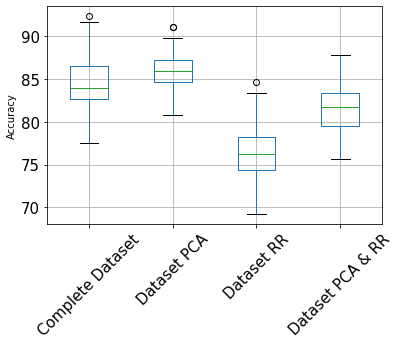

Mean accuracy of Complete Dataset for 100 repetitions is 84.481
Mean accuracy of Dataset PCA for 100 repetitions is 85.891
Mean accuracy of Dataset RR for 100 repetitions is 76.32
Mean accuracy of Dataset PCA & RR for 100 repetitions is 81.474


In [57]:
def main():
    complete_dataset,datasetPCA,datasetRR,datasetPCA_RR,Y = read_csv()
    ds = complete_dataset,datasetPCA,datasetRR,datasetPCA_RR,Y
    scores= {'Complete Dataset':[],'Dataset PCA':[],'Dataset RR':[],'Dataset PCA & RR':[]}

    DataSets = [complete_dataset,datasetPCA,datasetRR,datasetPCA_RR]
    dataset=['Complete Dataset','Dataset PCA','Dataset RR','Dataset PCA & RR']
    i=0

    for X in DataSets:
        print("\nTraining Standanrized",dataset[i])
        scaled_X = standarize(X)
        trainSVM(scaled_X,Y,dataset[i],scores[dataset[i]])
        
        i=i+1

    graph_bp(scores)
    for dataset in scores:
      print("Mean accuracy of",dataset,"after 100 repetitions is",np.round(np.mean(scores[dataset]),decimals=3))


main()